In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

In [25]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [26]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [27]:
dnn = Sequential([
    Flatten(input_shape = X_train.shape[1:]),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(10, activation = "softmax"),
])

dnn.compile(
    optimizer = Adam(5e-4),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"],
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
cnn = Sequential([
    Conv2D(
      input_shape = X_train.shape[1:],
      filters = 32,
      kernel_size = (3, 3),
      activation = "relu",
    ),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(10, activation = "softmax"),
])

cnn.compile(
    optimizer = Adam(5e-4),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"],
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
dnn_history = dnn.fit(
    X_train, y_train,
    epochs = 15,
    batch_size = 32,
    validation_split = 0.1,
)

cnn_history = cnn.fit(
    X_train, y_train,
    epochs = 15,
    batch_size = 32,
    validation_split = 0.1,
)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7474 - loss: 0.7561 - val_accuracy: 0.8335 - val_loss: 0.4505
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8554 - loss: 0.4019 - val_accuracy: 0.8633 - val_loss: 0.3765
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8709 - loss: 0.3503 - val_accuracy: 0.8733 - val_loss: 0.3445
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8815 - loss: 0.3230 - val_accuracy: 0.8787 - val_loss: 0.3391
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8859 - loss: 0.3070 - val_accuracy: 0.8818 - val_loss: 0.3336
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8942 - loss: 0.2906 - val_accuracy: 0.8813 - val_loss: 0.3214
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9008 - loss: 0.2687 - val_accuracy: 0.8847 - val_loss: 0.3230
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9028 - loss: 0.2621 -

In [30]:
cnn_loss, cnn_accuracy = cnn.evaluate(X_test, y_test)
dnn_loss, dnn_accuracy = dnn.evaluate(X_test, y_test)

print("Loss:")
print(f"CNN: {cnn_loss}, DNN: {dnn_loss}")

print("Accuracy:")
print(f"CNN: {cnn_accuracy}, DNN: {dnn_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9038 - loss: 0.2708
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8806 - loss: 0.3544
Loss:
CNN: 0.2682797610759735, DNN: 0.34744635224342346
Accuracy:
CNN: 0.9025999903678894, DNN: 0.8809999823570251


In [31]:
cnn_loss = cnn_history.history["loss"]
cnn_val_loss = cnn_history.history["val_loss"]
cnn_accuracy = cnn_history.history["accuracy"]
cnn_val_accuracy = cnn_history.history["val_accuracy"]

dnn_loss = dnn_history.history["loss"]
dnn_val_loss = dnn_history.history["val_loss"]
dnn_accuracy = dnn_history.history["accuracy"]
dnn_val_accuracy = dnn_history.history["val_accuracy"]

epochs = np.arange(0, 15)

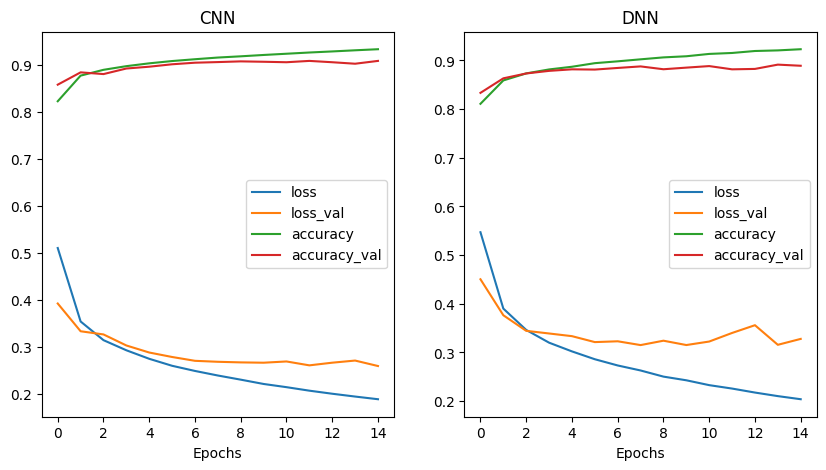

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].plot(epochs, cnn_loss, label="loss")
ax[0].plot(epochs, cnn_val_loss, label="loss_val")
ax[0].plot(epochs, cnn_accuracy, label="accuracy")
ax[0].plot(epochs, cnn_val_accuracy, label="accuracy_val")

ax[1].plot(epochs, dnn_loss, label="loss")
ax[1].plot(epochs, dnn_val_loss, label="loss_val")
ax[1].plot(epochs, dnn_accuracy, label="accuracy")
ax[1].plot(epochs, dnn_val_accuracy, label="accuracy_val")

ax[0].set_title("CNN")
ax[1].set_title("DNN")
ax[0].set_xlabel("Epochs")
ax[1].set_xlabel("Epochs")
ax[0].legend()
ax[1].legend()